## Rolling Forecast

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
shampoo=pd.read_csv('./data/sales-of-shampoo.csv', index_col='Month',parse_dates=True)

In [3]:
shampoo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 1-01 to 3-12
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales of shampoo  36 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes


index parsing 이 되지않음

In [12]:
from datetime import datetime

def dateparser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [13]:
shampoo=pd.read_csv('./data/sales-of-shampoo.csv', index_col='Month',parse_dates=True, date_parser=dateparser)

In [14]:
shampoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1901-01-01 to 1903-12-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales of shampoo  36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


index가 datetime 으로 parsing 되었음

In [16]:
from statsmodels.tsa.stattools import adfuller

def adf_check(ts):
    result=adfuller(ts)
    
    if result[1]<=0.05:
        print('Stationary {}'.format(result[1]))
    else:
        print('Non-stationary {}'.format(result[1]))

In [17]:
adf_check(shampoo['Sales of shampoo'])

Non-stationary 1.0


In [18]:
shampoo['1st diff']=shampoo['Sales of shampoo'] - shampoo['Sales of shampoo'].shift(1)

In [19]:
adf_check(shampoo['1st diff'].dropna())

Stationary 1.7998574141687034e-10


d=1

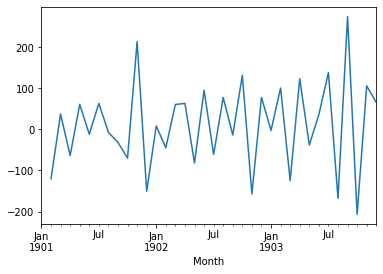

In [20]:
shampoo['1st diff'].plot()

In [21]:
shampoo['2nd diff']=shampoo['1st diff']-shampoo['1st diff'].shift(1)

In [23]:
adf_check(shampoo['2nd diff'].dropna())

Stationary 0.0039063349396599245


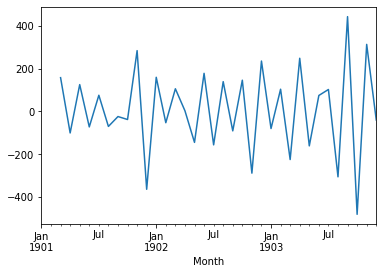

In [22]:
shampoo['2nd diff'].plot()

In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [32]:
p=list(range(0,5))
d=[1,2]
q=[0]

In [26]:
from itertools import product

In [33]:
pdq=list(product(p,d,q))

In [34]:
pdq

[(0, 1, 0),
 (0, 2, 0),
 (1, 1, 0),
 (1, 2, 0),
 (2, 1, 0),
 (2, 2, 0),
 (3, 1, 0),
 (3, 2, 0),
 (4, 1, 0),
 (4, 2, 0)]

In [35]:
for param in pdq:
    model=ARIMA(shampoo['Sales of shampoo'], order=param)
    result=model.fit()
    print('ARMIA{} - AIC:{}'.format(param, result.aic))

C:\Users\river\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\river\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\river\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\river\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\river\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\r

ARMIA(0, 1, 0) - AIC:429.2287465200137
ARMIA(0, 2, 0) - AIC:459.18288818425117
ARMIA(1, 1, 0) - AIC:406.57492460336283
ARMIA(1, 2, 0) - AIC:421.9349927282573
ARMIA(2, 1, 0) - AIC:406.37615708429206
ARMIA(2, 2, 0) - AIC:411.0042677566019
ARMIA(3, 1, 0) - AIC:408.3636731291474
ARMIA(3, 2, 0) - AIC:408.9752957643555
ARMIA(4, 1, 0) - AIC:410.35139123660406
ARMIA(4, 2, 0) - AIC:402.1235107664504


C:\Users\river\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\river\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\river\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\river\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\river\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\r

In [113]:
p=4
d=1
q=0

In [114]:
X=shampoo['Sales of shampoo'].values

In [115]:
size=int(len(X)*0.66)

In [116]:
train=X[:size]
test=X[size:]

In [117]:
history=[x for x in train]

In [118]:
prediction=list()

In [119]:
for t in range(len(test)):
    model=ARIMA(history, order=(p,d,q))
    result=model.fit()
    output=result.forecast() # default 1 step forecast
    yhat=output[0]
    prediction.append(yhat)
    obs=test[t]
    history.append(obs)

In [120]:
prediction

[338.71638193808025,
 287.1038526541817,
 361.38948311724226,
 327.6518979527226,
 371.5945171192044,
 349.2332054096682,
 431.79780962935223,
 372.3842442966194,
 468.66152885435145,
 490.25060069369147,
 453.3509577666234,
 613.3699093852175,
 513.6938788885734]

In [121]:
from sklearn.metrics import mean_squared_error

In [122]:
error=mean_squared_error(test, prediction)

In [123]:
rmse=np.sqrt(error)

In [124]:
rmse

95.06790968136653

In [125]:
shampoo['Sales of shampoo'].describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales of shampoo, dtype: float64

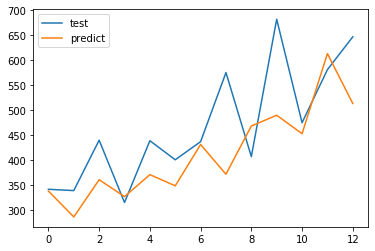

In [126]:
plt.plot(test, label='test')
plt.plot(prediction, label='predict')
plt.legend()